<a href="https://colab.research.google.com/github/viplav02/TensorFlow/blob/main/23_mar_flower_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
filepath = 'my_best_flower.h5'
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath=filepath,
                            monitor='val_loss',
                            verbose=1,
                            save_best_only=True,
                            mode='min')

In [2]:
callbacks = [checkpoint]

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

In [6]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 [==============================] - 1s 0us/step


In [7]:
data_dir


PosixPath('/root/.keras/datasets/flower_photos')

In [8]:
from keras.layers import Input,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
import matplotlib.pyplot as plt
from glob import glob

In [9]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [10]:
os.listdir(data_dir)

['LICENSE.txt', 'tulips', 'dandelion', 'roses', 'sunflowers', 'daisy']

In [15]:
tulips = len(os.listdir('/root/.keras/datasets/flower_photos/tulips'))
tulips

799

In [16]:
roses = len(os.listdir('/root/.keras/datasets/flower_photos/roses'))
roses


641

In [18]:
sunflowers = len(os.listdir('/root/.keras/datasets/flower_photos/sunflowers'))
sunflowers

699

In [19]:
roses = list(data_dir.glob('roses/*'))
roses

[PosixPath('/root/.keras/datasets/flower_photos/roses/4881402397_1c664af2f7_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/2777518561_105abc8cfc_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/6347846935_51e3dc2481_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/4061451210_1650590c6a.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/2392457180_f02dab5c65.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/15802657001_40fe77c030_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/515121050_dcb99890be.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/14683774134_6367640585.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/3145692843_d46ba4703c.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/9298314004_c1a8146521.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/1446097778_97149b8362.j

In [22]:
from keras.utils import load_img, img_to_array, array_to_img

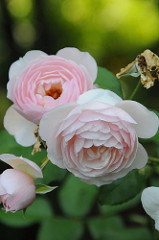

In [23]:
test = load_img('/root/.keras/datasets/flower_photos/roses/4921988677_e2eb0c9a24_m.jpg')
test

In [24]:
batch_size = 16
epochs = 10
IMG_HIEGHT = 224
IMG_WIDHT = 224

In [25]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                    validation_split=0.2)

In [26]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                    directory=data_dir,
                                                    shuffle=True,
                                                    target_size=(IMG_HIEGHT,IMG_HIEGHT),
                                                    subset='training')

Found 2939 images belonging to 5 classes.


In [27]:
train_data_gen.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [28]:
image_gen_val = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)

In [29]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                directory=data_dir,
                                                target_size=(IMG_HIEGHT,IMG_WIDHT),
                                                subset='validation')

Found 731 images belonging to 5 classes.


In [30]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1,5,figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [31]:
sample_images,labels = next(train_data_gen)

In [32]:
sample_images.shape

(16, 224, 224, 3)

In [33]:
labels

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

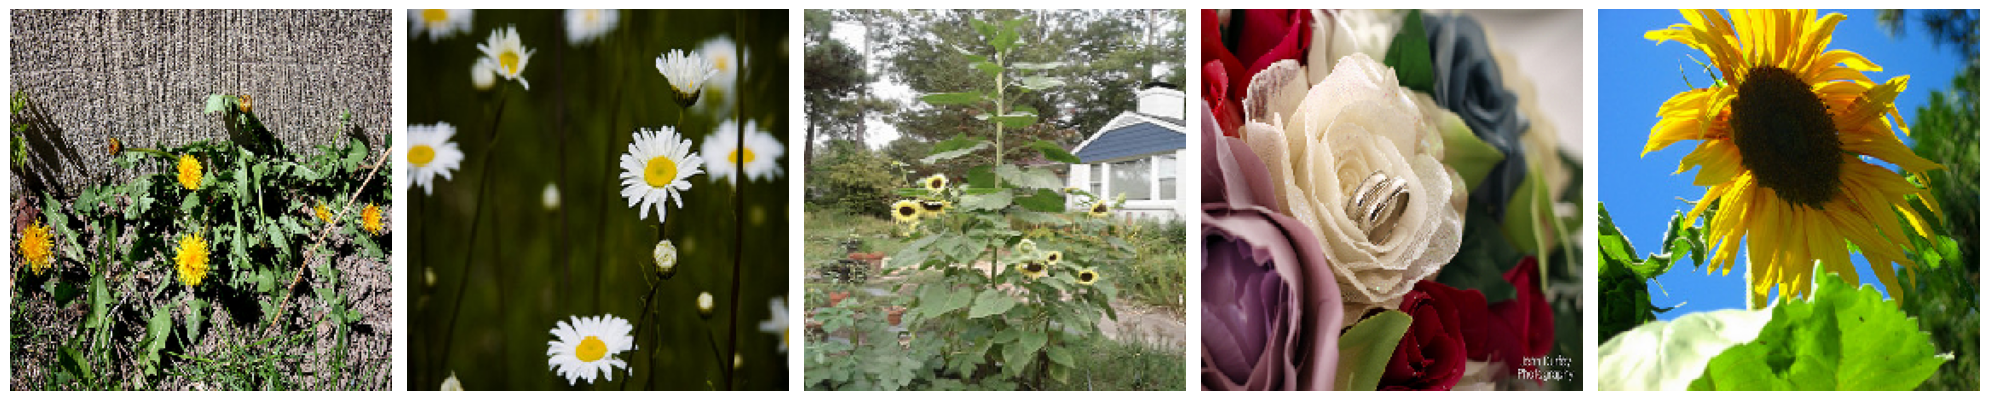

In [34]:
plotImages(sample_images[0:5])

In [35]:
IMAGE_SIZE = [224,224]

In [36]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3],weights='imagenet',include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [37]:
vgg.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [38]:
for layer in vgg.layers:
    layer.trainable = False

In [39]:
x = Flatten()(vgg.output)
prediction = Dense(5,activation='softmax')(x)

In [40]:
model = Model(inputs=vgg.input,outputs=prediction)

In [41]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [42]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [43]:
filepath = 'my_best_flower.h5'
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath=filepath,
                            monitor='val_loss',
                            verbose=1,
                            save_best_only=True,
                            mode='min')

In [44]:
callbacks = [checkpoint]

In [45]:
history = model.fit(train_data_gen,
                             validation_data=val_data_gen,
                             epochs=epochs,callbacks=callbacks)

Epoch 1/10
184/184 [==============================] - ETA: 0s - loss: 0.8658 - accuracy: 0.7087
Epoch 1: val_loss improved from inf to 0.87104, saving model to my_best_flower.h5
184/184 [==============================] - 32s 115ms/step - loss: 0.8658 - accuracy: 0.7087 - val_loss: 0.8710 - val_accuracy: 0.7127
Epoch 2/10
184/184 [==============================] - ETA: 0s - loss: 0.2778 - accuracy: 0.9092
Epoch 2: val_loss improved from 0.87104 to 0.54924, saving model to my_best_flower.h5
184/184 [==============================] - 17s 93ms/step - loss: 0.2778 - accuracy: 0.9092 - val_loss: 0.5492 - val_accuracy: 0.8140
Epoch 3/10
184/184 [==============================] - ETA: 0s - loss: 0.1086 - accuracy: 0.9721
Epoch 3: val_loss did not improve from 0.54924
184/184 [==============================] - 17s 94ms/step - loss: 0.1086 - accuracy: 0.9721 - val_loss: 0.6222 - val_accuracy: 0.7880
Epoch 4/10
184/184 [==============================] - ETA: 0s - loss: 0.0605 - accuracy: 0.9912
E

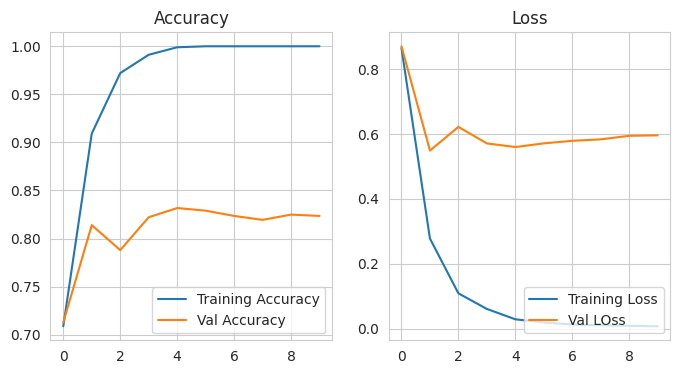

In [46]:
import seaborn as sns
sns.set_style('whitegrid')
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Val LOss')
plt.legend(loc='lower right')
plt.title('Loss')
plt.show()